## Downloading the data and first look


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt

In [11]:
# reading the data from its location
netflix_df =  pd.read_csv(r"C:\Users\Moga\final\netflix1.csv")
# showing the first 5 rows
netflix_df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [37]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [20]:
updated_netflix_df = netflix_df.drop(columns=["title", "director"])

## Data Visualization

Text(0.5, 1.0, 'Content type in percentage')

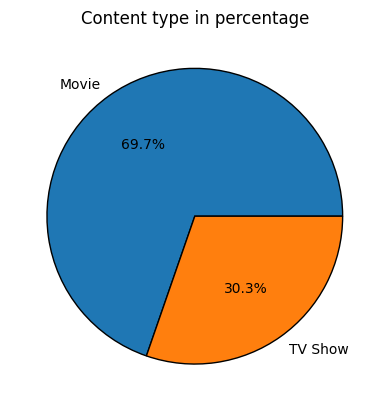

In [36]:
fig1 ,ax1 = plt.subplots()
ax1.pie(x =updated_netflix_df.type.value_counts(),labels= updated_netflix_df.type.unique()
        ,wedgeprops={"edgecolor" : "black"},normalize=True,autopct='%1.1f%%')# copy from google '%1.1f%%' to be honest
ax1.set_title("Content type in percentage")



Number of Contents Added through the Years

In [43]:
print (f"{updated_netflix_df.date_added.min()} min ,{updated_netflix_df.date_added.max()} max")

2008-01-01 00:00:00 min ,2021-09-25 00:00:00 max


In [51]:
bins = np.arange(2008,2022)
bins

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021])

Text(0, 0.5, 'number of show')

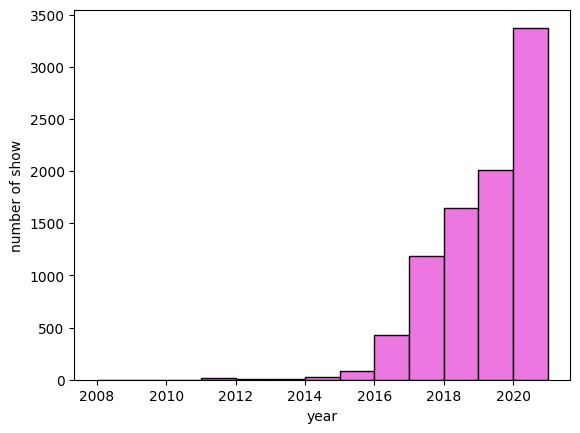

In [50]:
updated_netflix_df.date_added = pd.to_datetime(updated_netflix_df.date_added)
fig2 ,ax2 = plt.subplots()
ax2.hist(updated_netflix_df.date_added.dt.year, bins=bins,color="#ed77e1",edgecolor = "black")
ax2.set_xlabel("year")
ax2.set_ylabel("number of show")


## Top Directors in different content types



In [68]:
directordf =netflix_df[netflix_df.director.isin( netflix_df.director.value_counts(ascending=False)[1:10].index)]
directordf.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"
10,s941,Movie,Motu Patlu: Deep Sea Adventure,Suhas Kadav,India,5/1/2021,2014,TV-Y7,76 min,"Children & Family Movies, Comedies"
11,s942,Movie,Motu Patlu: Mission Moon,Suhas Kadav,India,5/1/2021,2013,TV-Y7,71 min,"Children & Family Movies, Comedies"
511,s420,Movie,Chhota Bheem: Bheem vs Aliens,Rajiv Chilaka,India,7/22/2021,2010,TV-Y7,69 min,"Children & Family Movies, Sports Movies"


<Axes: xlabel='Count', ylabel='director'>

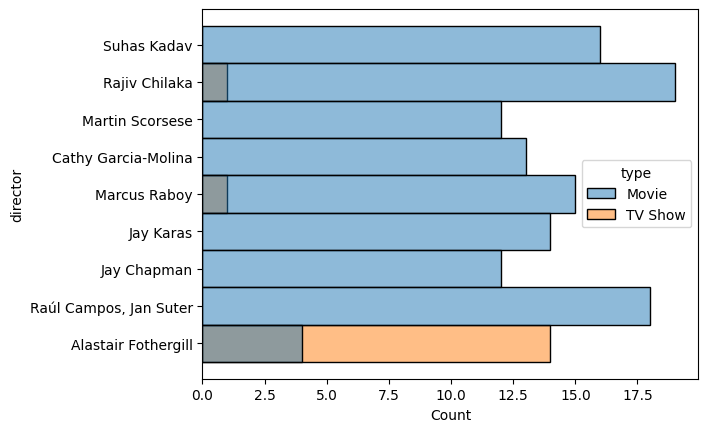

In [ ]:
sns.histplot(y=directordf["director"],
             hue=directordf.type  )

## Top Genres

In [79]:
netflix_df['listed_in'].value_counts().head(10).reset_index()

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Kids' TV,219
6,Children & Family Movies,215
7,"Children & Family Movies, Comedies",201
8,"Documentaries, International Movies",186
9,"Dramas, International Movies, Romantic Movies",180


C:\Users\Moga\AppData\Local\Temp\ipykernel_22428\3296834912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='count', y='listed_in', palette='viridis')


<Axes: xlabel='count', ylabel='listed_in'>

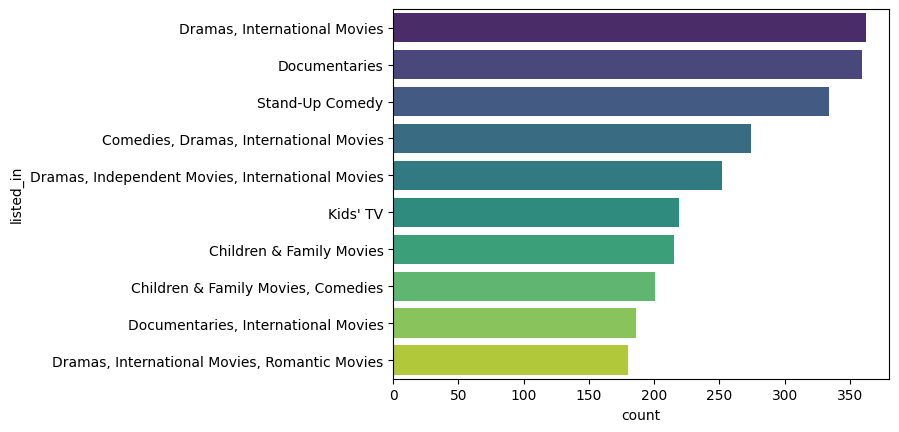

In [84]:
top_categories = netflix_df['listed_in'].value_counts().head(10).reset_index()
sns.barplot(data=top_categories, x='count', y='listed_in', palette='viridis')

## Top rating

In [89]:
netflix_df['rating'].value_counts().reset_index()

,rating,count
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


C:\Users\Moga\AppData\Local\Temp\ipykernel_22428\865808375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories, x='count', y='rating', palette='viridis')


<Axes: xlabel='count', ylabel='rating'>

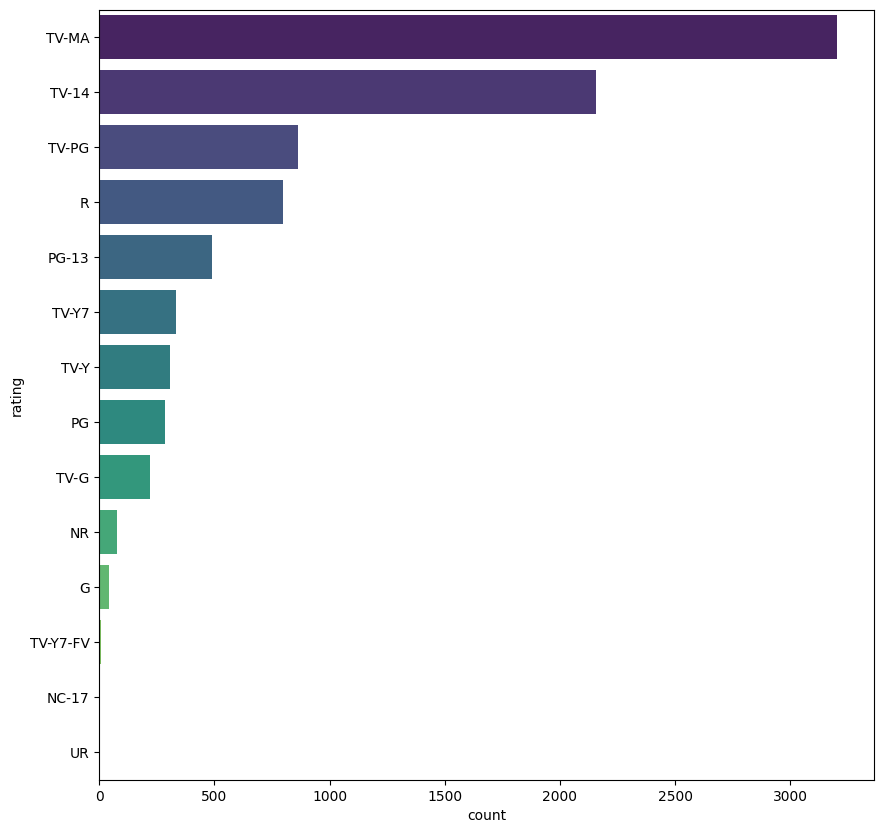

In [94]:
top_categories = netflix_df['rating'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(data=top_categories, x='count', y='rating', palette='viridis')